# Assignment: Logistic regression
15.2.2021 Marja Satukangas

In [1]:
#import libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

### Read data

In [2]:
# column names
colnames = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis', 'vertebral abnormality']

# read data 
df_c2 = pd.read_csv('C:/Users\Marja/Desktop\Metropolia/Uusi kansio/column_2C.dat', sep=" ", names=colnames)
df_c3 = pd.read_csv('C:/Users\Marja/Desktop\Metropolia/Uusi kansio/column_3C.dat', sep=" ", names=colnames)

df = df_c2

df.head(10)

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,vertebral abnormality
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
5,40.25,13.92,25.12,26.33,130.33,2.23,AB
6,53.43,15.86,37.17,37.57,120.57,5.99,AB
7,45.37,10.76,29.04,34.61,117.27,-10.68,AB
8,43.79,13.53,42.69,30.26,125.00,13.29,AB
9,36.69,5.01,41.95,31.68,84.24,0.66,AB


In [3]:
df.isna().sum()

pelvic incidence              0
pelvic tilt                   0
lumbar lordosis angle         0
sacral slope                  0
pelvic radius                 0
grade of spondylolisthesis    0
vertebral abnormality         0
dtype: int64

In [4]:
df.count()

pelvic incidence              310
pelvic tilt                   310
lumbar lordosis angle         310
sacral slope                  310
pelvic radius                 310
grade of spondylolisthesis    310
vertebral abnormality         310
dtype: int64

<AxesSubplot:>

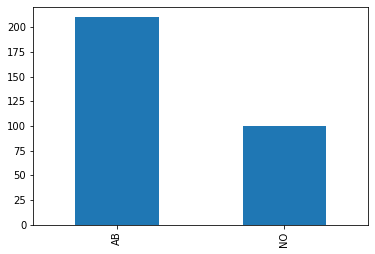

In [5]:
df['vertebral abnormality'].value_counts().plot(kind="bar")

### Preprocessing

In [6]:
#separate features and labels
Y = df.pop('vertebral abnormality')
X = df

In [7]:
#separate train set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Building model

In [8]:
# build and fit model

reg = LogisticRegression()
reg.fit(X_train,Y_train)

Y_pred = reg.predict(X_test)


### Evaluation

With a separate test set (which was quite small) accuracy of 0.79 was accieved. 

In [9]:
predictions = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
predictions.head(10)

,Actual,Predicted
300,NO,NO
145,AB,AB
302,NO,AB
222,NO,AB
52,AB,AB
279,NO,NO
22,AB,AB
171,AB,NO
191,AB,AB
245,NO,NO


In [10]:
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion matrix:\n",cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("Accuracy calculated from the test set = %.3f" % (accuracy))

print(classification_report(Y_test, Y_pred, target_names=['AB', 'NO']))

Confusion matrix:
 [[36  7]
 [ 6 13]]
Accuracy calculated from the test set = 0.790
              precision    recall  f1-score   support

          AB       0.86      0.84      0.85        43
          NO       0.65      0.68      0.67        19

    accuracy                           0.79        62
   macro avg       0.75      0.76      0.76        62
weighted avg       0.79      0.79      0.79        62



### Diagnostic tool

In [ ]:
feature_colnames = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis']
end=0

while end!='q':
    print("Give radiographic measurements of a patient: ")
    features = []
    for i in feature_colnames:
        x = float(input((i + " ")))
        features.append(x)
    
    x_values = np.asarray(features).reshape(1, -1)
    pred = reg.predict_proba(x_values)
    
    probability = "{:.0%}".format(pred[0][0])

    print ("The patient have a vertebral abnormality with", probability, "probability")
    print ("To quit, press q. To continue, press any other key.")
    end = input("continue? ")
    

Give radiographic measurements of a patient: 
pelvic incidence 39
pelvic tilt 10
lumbar lordosis angle 25
sacral slope 29
pelvic radius 114
grade of spondylolisthesis 5
The patient have a vertebral abnormality with 81% probability
To quit, press q. To continue, press any other key.
